In [0]:
#https://medium.com/fintechexplained/how-i-used-machine-learning-to-organise-football-matches-2e4953125ca7

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# library

from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
training = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/training/trainingSet_noEmpty.csv")
testing = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/testing/testingSet_noEmpty.csv")

print(training.shape)
print(training.columns)
print()
print(testing.shape)
print(testing.columns)

(2690, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)

(1140, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)


In [0]:
# combine training and testing set
data =  pd.concat([training, testing],sort=False)

In [6]:
print(data.shape)

(3830, 123)


In [0]:
# Label Encode the values of FTR
data['FTR'] = data['FTR'].map({'A':0,'D':1,'H':2})

In [0]:
# convert back those attribute to int
data.iloc[:,0:20] = data.iloc[:,0:20].astype(int)

In [0]:
data.iloc[:,65:122] = data.iloc[:,65:122].astype(int)
#testing.iloc[:,65:122] = testing.iloc[:,65:122].astype(int)

In [0]:
# Rearrange the columns
data = data[['Spanish Div', 'Year', 'Month', 'Day', 'HomeTeam_Alaves', 'HomeTeam_Almeria', 'HomeTeam_Ath Bilbao',
       'HomeTeam_Ath Madrid', 'HomeTeam_Barcelona', 'HomeTeam_Betis',
       'HomeTeam_Celta', 'HomeTeam_Eibar', 'HomeTeam_Elche',
       'HomeTeam_Espanol', 'HomeTeam_Getafe', 'HomeTeam_Girona',
       'HomeTeam_Granada', 'HomeTeam_La Coruna', 'HomeTeam_Las Palmas',
       'HomeTeam_Leganes', 'HomeTeam_Levante', 'HomeTeam_Malaga',
       'HomeTeam_Osasuna', 'HomeTeam_Real Madrid', 'HomeTeam_Sevilla',
       'HomeTeam_Sociedad', 'HomeTeam_Sp Gijon', 'HomeTeam_Valencia',
       'HomeTeam_Valladolid', 'HomeTeam_Vallecano', 'HomeTeam_Villarreal',
       'AwayTeam_Alaves', 'AwayTeam_Almeria', 'AwayTeam_Ath Bilbao',
       'AwayTeam_Ath Madrid', 'AwayTeam_Barcelona', 'AwayTeam_Betis',
       'AwayTeam_Celta', 'AwayTeam_Eibar', 'AwayTeam_Elche',
       'AwayTeam_Espanol', 'AwayTeam_Getafe', 'AwayTeam_Girona',
       'AwayTeam_Granada', 'AwayTeam_La Coruna', 'AwayTeam_Las Palmas',
       'AwayTeam_Leganes', 'AwayTeam_Levante', 'AwayTeam_Malaga',
       'AwayTeam_Osasuna', 'AwayTeam_Real Madrid', 'AwayTeam_Sevilla',
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'FTR']]

In [11]:
print(data.shape)

(3830, 78)


In [0]:
features = data[['HTR_A', 'HTR_D', 'HTR_H', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST','HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','FTR']]

In [13]:
print(features.shape)

(3830, 20)


In [0]:
#KMeans Model
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

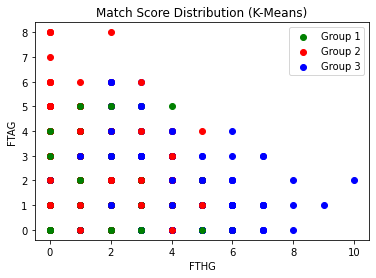

In [125]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) 
kmeans.fit(features)

for i in range(0, data.shape[0]):

    if (kmeans.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='g')
    elif (kmeans.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='r')
    elif (kmeans.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='b')

plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (K-Means)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/KMeans_matchscoredistribution.jpeg')
plt.show()

In [16]:
'''
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) 
kmeans.fit(features)

for i in range(0, data.shape[0]):
    label_0 = 0
    label_1 = 0
    label_2 = 0

    if (kmeans.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='g')
    elif (kmeans.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='r')
    elif (kmeans.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='b')

plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTHG')
plt.ylabel('HS')
plt.title('The coversion rate of shooting to goal for home team')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/kMeans_hometeamconversionrate.jpeg')
plt.show()
'''

"\nkmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) \nkmeans.fit(features)\n\nfor i in range(0, data.shape[0]):\n    label_0 = 0\n    label_1 = 0\n    label_2 = 0\n\n    if (kmeans.labels_[i] == 0):\n        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='g')\n    elif (kmeans.labels_[i] ==1):\n        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='r')\n    elif (kmeans.labels_[i] == 2):\n        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,7],c='b')\n\nplt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])\nplt.xlabel('FTHG')\nplt.ylabel('HS')\nplt.title('The coversion rate of shooting to goal for home team')\nplt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/kMeans_hometeamconversionrate.jpeg')\nplt.show()\n"

In [17]:
'''
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) 
kmeans.fit(features)
for i in range(0, data.shape[0]):
    if (kmeans.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='g')
    elif (kmeans.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='r')
    elif (kmeans.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='b')

plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTAG')
plt.ylabel('AS')
plt.title('The coversion rate of shooting to goal for away team')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/kMeans_awayteamconversionrate.jpeg')
plt.show()
'''

"\nkmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) \nkmeans.fit(features)\nfor i in range(0, data.shape[0]):\n    if (kmeans.labels_[i] == 0):\n        c1 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='g')\n    elif (kmeans.labels_[i] ==1):\n        c2 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='r')\n    elif (kmeans.labels_[i] == 2):\n        c3 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='b')\n\nplt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])\nplt.xlabel('FTAG')\nplt.ylabel('AS')\nplt.title('The coversion rate of shooting to goal for away team')\nplt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/kMeans_awayteamconversionrate.jpeg')\nplt.show()\n"

In [18]:
#kmeans.cluster_centers_

array([[ 0.19310793,  0.45383615,  0.35305592,  1.36280884,  0.87191157,
         0.60403121,  0.37321196, 12.22041612,  8.56306892,  4.18985696,
         2.89791938, 15.39336801, 16.03315995,  5.54031209,  3.81014304,
         2.58517555,  3.03381014,  0.11443433,  0.16905072,  1.2496749 ],
       [ 0.26500858,  0.39108062,  0.34391081,  1.30360206,  1.54030875,
         0.67409949,  0.59262436, 10.77958834, 15.64751286,  3.82075472,
         5.65866209, 15.09605489, 12.38250429,  4.53001715,  6.135506  ,
         2.68696398,  2.40137221,  0.18353345,  0.09862779,  0.94596913],
       [ 0.23268206,  0.37300178,  0.39431616,  2.24067496,  1.09502664,
         0.88454707,  0.56660746, 19.59413854,  9.25044405,  7.46802842,
         3.37477798, 12.04351687, 13.42895204,  8.00888099,  3.61456483,
         2.0035524 ,  2.62788632,  0.07726465,  0.22468917,  1.39698046]])

In [19]:
'''
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_)
dists
'''

array([[ 0.        ,  8.99398528,  9.56185717],
       [ 8.99398528,  0.        , 12.95694452],
       [ 9.56185717, 12.95694452,  0.        ]])

In [0]:
tri_dists = dists[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

In [0]:
'''
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) 
kmeans.fit(features)
for i in range(0, data.shape[0]):
    if (kmeans.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='g')
    elif (kmeans.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='r')
    elif (kmeans.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,4],features.iloc[i,8],c='b')

plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTAG')
plt.ylabel('AS')
plt.title('The coversion rate of shooting to goal for away team')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/KMeans_homeAwayGoals.jpeg')
plt.show()
'''

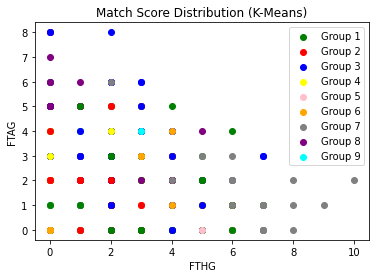

In [126]:
kmeans2 = KMeans(n_clusters=9,init='k-means++',max_iter=200, n_init=1,verbose=0, random_state=4514) 
kmeans2.fit(features)

for i in range(0, data.shape[0]):
    
    if (kmeans2.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='green')
    elif (kmeans2.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='red')
    elif (kmeans2.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='blue')
    elif (kmeans2.labels_[i] ==3):
        c4 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='yellow')
    elif (kmeans2.labels_[i] == 4):
        c5 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='pink')
    elif (kmeans2.labels_[i] == 5):
        c6 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='orange')
    elif (kmeans2.labels_[i] == 6):
        c7 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='grey')
    elif (kmeans2.labels_[i] == 7):
        c8 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='purple')
    elif (kmeans2.labels_[i] == 8):
        c9 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='cyan')
    

plt.legend([c1, c2, c3, c4, c5, c6, c7, c8, c9], ['Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','Group 7','Group 8','Group 9'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (K-Means)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/KMeans_matchscoredistribution2.jpeg')
plt.show()

In [0]:
#hierarchical clsuter

In [0]:
import sys
sys.setrecursionlimit(5000)

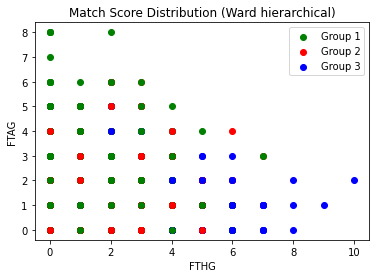

In [127]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3) 
agg.fit(features)

for i in range(0, data.shape[0]):
    
    if (agg.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='green')
    elif (agg.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='red')
    elif (agg.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='blue')
    
plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (Ward hierarchical)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/Agglomerative_homeAwayGoals.jpeg')
plt.show()

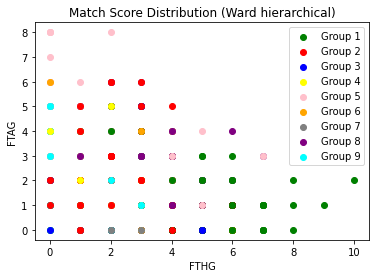

In [128]:
from sklearn.cluster import AgglomerativeClustering
agg2 = AgglomerativeClustering(n_clusters=9) 
agg2.fit(features)

for i in range(0, data.shape[0]):
    
    if (agg2.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='green')
    elif (agg2.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='red')
    elif (agg2.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='blue')
    elif (agg2.labels_[i] ==3):
        c4 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='yellow')
    elif (agg2.labels_[i] == 4):
        c5 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='pink')
    elif (agg2.labels_[i] == 5):
        c6 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='orange')
    elif (agg2.labels_[i] == 6):
        c7 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='grey')
    elif (agg2.labels_[i] == 7):
        c8 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='purple')
    elif (agg2.labels_[i] == 8):
        c9 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='cyan')
    

plt.legend([c1, c2, c3, c4, c5, c6, c7, c8, c9], ['Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','Group 7','Group 8','Group 9'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (Ward hierarchical)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/Agglomerative_homeAwayGoals2.jpeg')
plt.show()

In [0]:
#Birch clustering

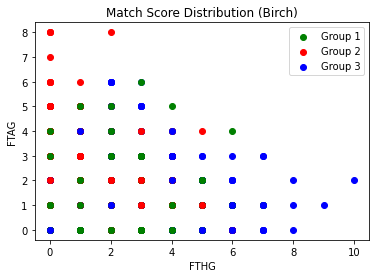

In [129]:
# Birch Clustering
from sklearn.cluster import Birch
bi = Birch(n_clusters=3) 
bi.fit(features)

for i in range(0, data.shape[0]):
    
    if (bi.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='green')
    elif (bi.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='red')
    elif (bi.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='blue')

plt.legend([c1, c2, c3], ['Group 1','Group 2','Group 3'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (Birch)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/Birch_homeAwayGoals.jpeg')
plt.show()


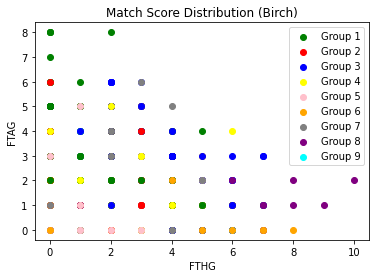

In [130]:
# Birch Clustering
from sklearn.cluster import Birch
bi2 = Birch(n_clusters=9) 
bi2.fit(features)

for i in range(0, data.shape[0]):
    
    if (bi2.labels_[i] == 0):
        c1 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='green')
    elif (bi2.labels_[i] ==1):
        c2 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='red')
    elif (bi2.labels_[i] == 2):
        c3 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='blue')
    elif (bi2.labels_[i] ==3):
        c4 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='yellow')
    elif (bi2.labels_[i] == 4):
        c5 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='pink')
    elif (bi2.labels_[i] == 5):
        c6 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='orange')
    elif (bi2.labels_[i] == 6):
        c7 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='grey')
    elif (bi2.labels_[i] == 7):
        c8 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='purple')
    elif (bi2.labels_[i] == 8):
        c9 = plt.scatter(features.iloc[i,3],features.iloc[i,4],c='cyan')
    

plt.legend([c1, c2, c3, c4, c5, c6, c7, c8, c9], ['Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','Group 7','Group 8','Group 9'])
plt.xlabel('FTHG')
plt.ylabel('FTAG')
plt.title('Match Score Distribution (Birch)')
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/source code/cluster/Birch_homeAwayGoals2.jpeg')
plt.show()

In [0]:
pred_bi = bi.predict(features)
pred_bi2 = bi.predict(features)

In [60]:
# Count the number of samples in each clusters
from collections import Counter, defaultdict
print("Actual Labels of FTR: ", (Counter(data['FTR'])))
print("Actual Labels of FTHG: ", (Counter(data['FTHG'])))
print("Actual Labels of FTAG: ", (Counter(data['FTAG'])))
print()
print("Predict (k-means where K=3): ", (Counter(kmeans.labels_)))
print("Predict (k-means where K=9): ", (Counter(kmeans2.labels_)))
print()
print("Predict (hierarchical where n=3): ", (Counter(agg.labels_)))
print("Predict (hierarchical where n=9): ", (Counter(agg2.labels_)))
print()
print("Predict (Birch Clustering where n=3): ", (Counter(bi.labels_)))
print("Predict (Birch Clustering where n=9): ", (Counter(bi2.labels_)))
print()


Actual Labels of FTR:  Counter({2: 1841, 0: 1073, 1: 916})
Actual Labels of FTHG:  Counter({1: 1207, 2: 929, 0: 859, 3: 473, 4: 225, 5: 91, 6: 30, 7: 11, 8: 3, 9: 1, 10: 1})
Actual Labels of FTAG:  Counter({0: 1325, 1: 1316, 2: 756, 3: 272, 4: 105, 5: 39, 6: 12, 8: 4, 7: 1})

Predict (k-means where K=3):  Counter({0: 1538, 1: 1166, 2: 1126})
Predict (k-means where K=9):  Counter({1: 562, 3: 532, 0: 496, 4: 435, 5: 405, 2: 391, 6: 358, 7: 335, 8: 316})

Predict (hierarchical where n=3):  Counter({1: 1781, 0: 1583, 2: 466})
Predict (hierarchical where n=9):  Counter({2: 618, 1: 552, 3: 516, 0: 466, 4: 444, 6: 426, 8: 327, 5: 260, 7: 221})

Predict (Birch Clustering where n=3):  Counter({0: 1559, 1: 1313, 2: 958})
Predict (Birch Clustering where n=9):  Counter({3: 640, 1: 619, 0: 554, 4: 487, 2: 479, 6: 432, 5: 370, 8: 140, 7: 109})



In [0]:
#MNI

In [61]:
from sklearn import metrics
print("MNI of k-means(K=3): ", metrics.normalized_mutual_info_score(data['FTR'], kmeans.labels_))
print("MNI of k-means(K=9): ", metrics.normalized_mutual_info_score(data['FTR'], kmeans2.labels_))
print("MNI of hierarchical(N=3): ", metrics.normalized_mutual_info_score(data['FTR'], agg.labels_))
print("MNI of hierarchical(N=9): ", metrics.normalized_mutual_info_score(data['FTR'], agg2.labels_))
print("MNI of birch(N=3): ", metrics.normalized_mutual_info_score(data['FTR'], bi.labels_))
print("MNI of birch(N=9): ", metrics.normalized_mutual_info_score(data['FTR'], bi2.labels_))


MNI of k-means(K=3):  0.02113340993209177
MNI of k-means(K=9):  0.021292802860800774
MNI of hierarchical(N=3):  0.02817741368403824
MNI of hierarchical(N=9):  0.027096335915557376
MNI of birch(N=3):  0.01641558222218676
MNI of birch(N=9):  0.018873308575047845


In [62]:
from sklearn import metrics
print("MNI of k-means(K=3): ", metrics.normalized_mutual_info_score(data['FTHG'], kmeans.labels_))
print("MNI of k-means(K=9): ", metrics.normalized_mutual_info_score(data['FTHG'], kmeans2.labels_))
print("MNI of hierarchical(N=3): ", metrics.normalized_mutual_info_score(data['FTHG'], agg.labels_))
print("MNI of hierarchical(N=9): ", metrics.normalized_mutual_info_score(data['FTHG'], agg2.labels_))
print("MNI of birch(N=3): ", metrics.normalized_mutual_info_score(data['FTHG'], bi.labels_))
print("MNI of birch(N=9): ", metrics.normalized_mutual_info_score(data['FTHG'], bi2.labels_))

MNI of k-means(K=3):  0.03524818367955691
MNI of k-means(K=9):  0.030887470375345366
MNI of hierarchical(N=3):  0.03843481567276274
MNI of hierarchical(N=9):  0.03892411232744279
MNI of birch(N=3):  0.023438784693554492
MNI of birch(N=9):  0.028273905013789288


In [63]:
from sklearn import metrics
print("MNI of k-means(K=3): ", metrics.normalized_mutual_info_score(data['FTAG'], kmeans.labels_))
print("MNI of k-means(K=9): ", metrics.normalized_mutual_info_score(data['FTAG'], kmeans2.labels_))
print("MNI of hierarchical(N=3): ", metrics.normalized_mutual_info_score(data['FTAG'], agg.labels_))
print("MNI of hierarchical(N=9): ", metrics.normalized_mutual_info_score(data['FTAG'], agg2.labels_))
print("MNI of birch(N=3): ", metrics.normalized_mutual_info_score(data['FTAG'], bi.labels_))
print("MNI of birch(N=9): ", metrics.normalized_mutual_info_score(data['FTAG'], bi2.labels_))

MNI of k-means(K=3):  0.02443541050916287
MNI of k-means(K=9):  0.02965118868219068
MNI of hierarchical(N=3):  0.01649953590661674
MNI of hierarchical(N=9):  0.028080206441325462
MNI of birch(N=3):  0.019131822166585065
MNI of birch(N=9):  0.027027873772253793


In [0]:
#Homogeneity

In [64]:
from sklearn import metrics
print("homogeneity of k-means(K=3): ", metrics.homogeneity_score(data['FTR'], kmeans.labels_))
print("homogeneity of k-means(K=9): ", metrics.homogeneity_score(data['FTR'], kmeans2.labels_))
print("homogeneity of hierarchical(K=3): ", metrics.homogeneity_score(data['FTR'], agg.labels_))
print("homogeneity of hierarchical(K=9): ", metrics.homogeneity_score(data['FTR'], agg2.labels_))
print("homogeneity of birch(N=3): ", metrics.homogeneity_score(data['FTR'], bi.labels_))
print("homogeneity of birch(N=9): ", metrics.homogeneity_score(data['FTR'], bi2.labels_))

homogeneity of k-means(K=3):  0.021511592042478135
homogeneity of k-means(K=9):  0.0327204714887404
homogeneity of hierarchical(K=3):  0.027195704195708607
homogeneity of hierarchical(K=9):  0.04128582513115104
homogeneity of birch(N=3):  0.0166401393926401
homogeneity of birch(N=9):  0.0282031206155013


In [65]:
from sklearn import metrics
from sklearn import metrics
print("homogeneity of k-means(K=3): ", metrics.homogeneity_score(data['FTHG'], kmeans.labels_))
print("homogeneity of k-means(K=9): ", metrics.homogeneity_score(data['FTHG'], kmeans2.labels_))
print("homogeneity of hierarchical(K=3): ", metrics.homogeneity_score(data['FTHG'], agg.labels_))
print("homogeneity of hierarchical(K=9): ", metrics.homogeneity_score(data['FTHG'], agg2.labels_))
print("homogeneity of birch(N=3): ", metrics.homogeneity_score(data['FTHG'], bi.labels_))
print("homogeneity of birch(N=9): ", metrics.homogeneity_score(data['FTHG'], bi2.labels_))

homogeneity of k-means(K=3):  0.02945603068402297
homogeneity of k-means(K=9):  0.03619809734335991
homogeneity of hierarchical(K=3):  0.030805297511464963
homogeneity of hierarchical(K=9):  0.045287951768529996
homogeneity of birch(N=3):  0.019523168444465656
homogeneity of birch(N=9):  0.03235902304450918


In [66]:
from sklearn import metrics
from sklearn import metrics
print("homogeneity of k-means(K=3): ", metrics.homogeneity_score(data['FTAG'], kmeans.labels_))
print("homogeneity of k-means(K=9): ", metrics.homogeneity_score(data['FTAG'], kmeans2.labels_))
print("homogeneity of hierarchical(K=3): ", metrics.homogeneity_score(data['FTAG'], agg.labels_))
print("homogeneity of hierarchical(K=9): ", metrics.homogeneity_score(data['FTAG'], agg2.labels_))
print("homogeneity of birch(N=3): ", metrics.homogeneity_score(data['FTAG'], bi.labels_))
print("homogeneity of birch(N=9): ", metrics.homogeneity_score(data['FTAG'], bi2.labels_))

homogeneity of k-means(K=3):  0.02161445534854501
homogeneity of k-means(K=9):  0.037650449036373344
homogeneity of hierarchical(K=3):  0.013948656217700096
homogeneity of hierarchical(K=9):  0.03538410431481017
homogeneity of birch(N=3):  0.016863256606638368
homogeneity of birch(N=9):  0.03346943969540116


In [0]:
# Adjusted Rand Index

In [68]:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI of k-means(K=3): ", metrics.adjusted_rand_score(data['FTR'], kmeans.labels_))
print("ARI of k-means(K=9): ", metrics.adjusted_rand_score(data['FTR'], kmeans2.labels_))
print("ARI of hierarchical(K=3): ", metrics.adjusted_rand_score(data['FTR'], agg.labels_))
print("ARI of hierarchical(K=9): ", metrics.adjusted_rand_score(data['FTR'], agg2.labels_))
print("ARI of Birch(N=3): ", metrics.adjusted_rand_score(data['FTR'], bi.labels_))
print("ARI of Birch(N=9): ", metrics.adjusted_rand_score(data['FTR'], bi2.labels_))

ARI of k-means(K=3):  0.021931319682935067
ARI of k-means(K=9):  0.011186751951102709
ARI of hierarchical(K=3):  0.016248058813565364
ARI of hierarchical(K=9):  0.018047656592387544
ARI of Birch(N=3):  0.017005464253288066
ARI of Birch(N=9):  0.008881147963851201


In [69]:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI of k-means(K=3): ", metrics.adjusted_rand_score(data['FTHG'], kmeans.labels_))
print("ARI of k-means(K=9): ", metrics.adjusted_rand_score(data['FTHG'], kmeans2.labels_))
print("ARI of hierarchical(K=3): ", metrics.adjusted_rand_score(data['FTHG'], agg.labels_))
print("ARI of hierarchical(K=9): ", metrics.adjusted_rand_score(data['FTHG'], agg2.labels_))
print("ARI of Birch(N=3): ", metrics.adjusted_rand_score(data['FTHG'], bi.labels_))
print("ARI of Birch(N=9): ", metrics.adjusted_rand_score(data['FTHG'], bi2.labels_))

ARI of k-means(K=3):  0.01882911791705914
ARI of k-means(K=9):  0.009216707634353706
ARI of hierarchical(K=3):  0.02919496931214417
ARI of hierarchical(K=9):  0.010202854784746966
ARI of Birch(N=3):  0.014121639466027765
ARI of Birch(N=9):  0.010604891580601825


In [70]:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI of k-means(K=3): ", metrics.adjusted_rand_score(data['FTAG'], kmeans.labels_))
print("ARI of k-means(K=9): ", metrics.adjusted_rand_score(data['FTAG'], kmeans2.labels_))
print("ARI of hierarchical(K=3): ", metrics.adjusted_rand_score(data['FTAG'], agg.labels_))
print("ARI of hierarchical(K=9): ", metrics.adjusted_rand_score(data['FTAG'], agg2.labels_))
print("ARI of Birch(N=3): ", metrics.adjusted_rand_score(data['FTAG'], bi.labels_))
print("ARI of Birch(N=9): ", metrics.adjusted_rand_score(data['FTAG'], bi2.labels_))

ARI of k-means(K=3):  0.020079266122202417
ARI of k-means(K=9):  0.011840748866018092
ARI of hierarchical(K=3):  0.004290371069202068
ARI of hierarchical(K=9):  0.01299409649363369
ARI of Birch(N=3):  0.01733979492424438
ARI of Birch(N=9):  0.007010235115127329
